In [6]:
import pandas as pd

# load data
data = pd.read_csv("data/processed-data.csv") 

# define numerical and categorical columns
numerical_columns = ["Nitrogen Content", "Phosphorous Content", "Potassium Content", "temperature", "humidity"]
categorical_columns = ["ph", "rainfall"]



In [7]:
# group by class label
rules = {}
for label, group in data.groupby("label"):
    rule = {}

   
    for col in numerical_columns:
        rule[col] = (group[col].min(), group[col].max())

    for col in categorical_columns:
        rule[col] = group[col].mode()[0] if not group[col].mode().empty else None

    rules[label] = rule



In [8]:
# print extracted rules
for label, conditions in rules.items():
    print(f"Rules for {label}:")
    for col, val in conditions.items():
        if isinstance(val, tuple):
            print(f"  {col}: {val[0]} to {val[1]}")
        else:
            print(f"  {col}: {val}")
    print("\n")

Rules for coffee:
  Nitrogen Content: 0.5714285714285714 to 0.8571428571428571
  Phosphorous Content: 0.0714285714285714 to 0.25
  Potassium Content: 0.0526315789473684 to 0.1052631578947368
  temperature: 0.4297271287566384 to 0.5765806131344975
  humidity: 0.4156803948591286 to 0.6745917683011258
  ph: Neutral
  rainfall: Extremely Heavy Rain


Rules for cotton:
  Nitrogen Content: 0.7142857142857143 to 1.0
  Phosphorous Content: 0.2142857142857142 to 0.3928571428571428
  Potassium Content: 0.0 to 0.0526315789473684
  temperature: 0.3977654071234973 to 0.5182715492301688
  humidity: 0.7403823670554472 to 0.8687979178858863
  ph: Neutral
  rainfall: Very Heavy Rain


Rules for grapes:
  Nitrogen Content: 0.0 to 0.2857142857142857
  Phosphorous Content: 0.8214285714285714 to 1.0
  Potassium Content: 0.9473684210526316 to 1.0
  temperature: 0.0 to 1.0
  humidity: 0.805570406783002 to 0.8571786532243088
  ph: Slightly Acid
  rainfall: Heavy Rain


Rules for jute:
  Nitrogen Content: 0.42

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

# Encode categorical features
data_encoded = data.copy()
label_encoders = {}

for col in categorical_columns + ["label"]:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Split features and target
X = data_encoded[numerical_columns + categorical_columns]
y = data_encoded["label"]

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Generate decision tree visualization
dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=X.columns, class_names=label_encoders["label"].classes_,
    filled=True, rounded=True, special_characters=True
)

# Display the decision tree
graph = graphviz.Source(dot_data)
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

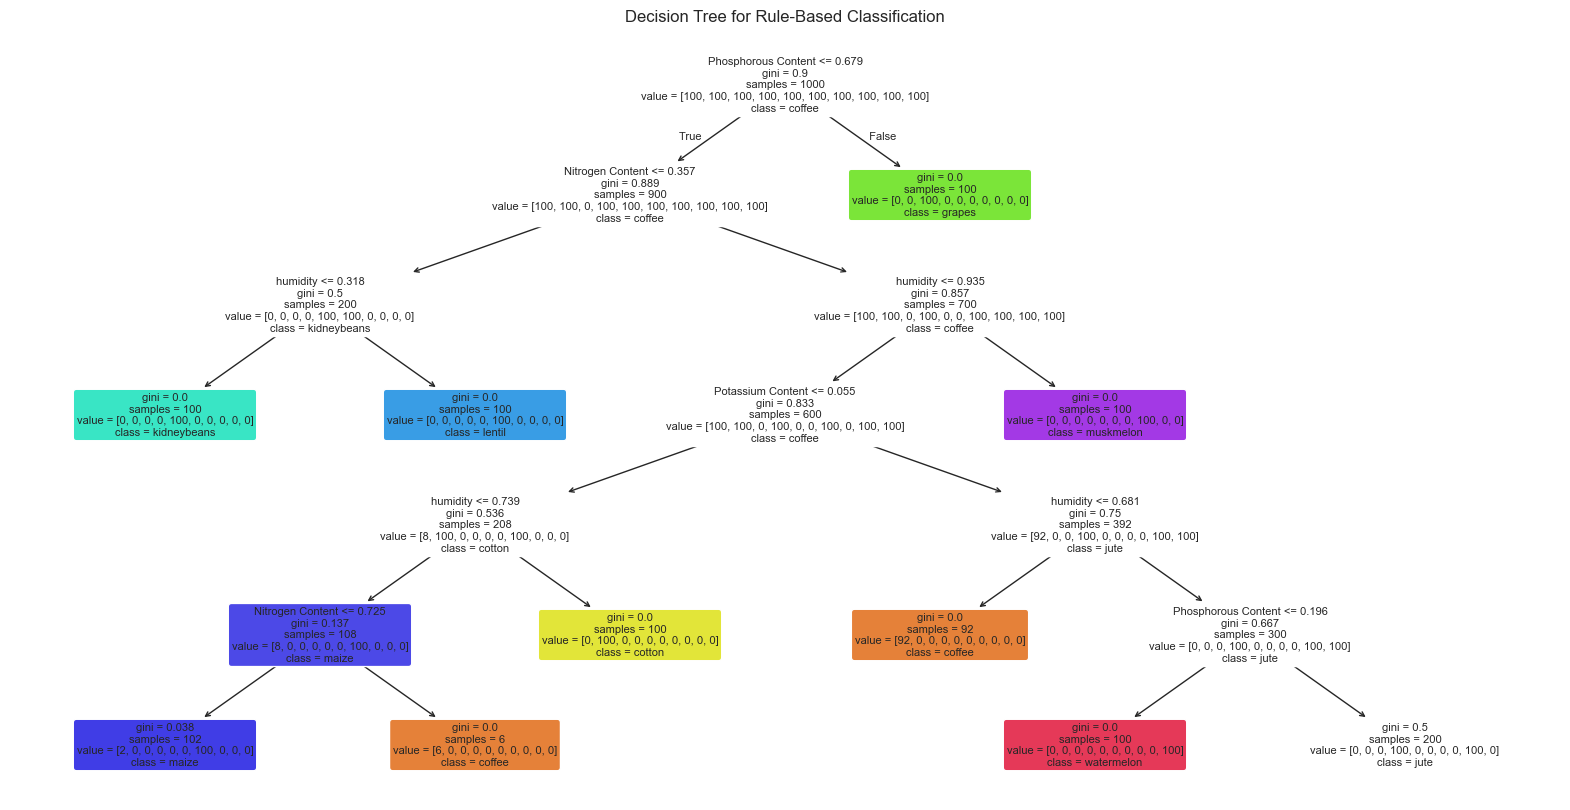

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
label_encoders = {}

for col in categorical_columns + ["label"]:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

X = data_encoded[numerical_columns + categorical_columns]
y = data_encoded["label"]

clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders["label"].classes_, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for Rule-Based Classification")
plt.show()
